In [112]:
# Import packages, the Y-matrix for the dataset and Functions.py
import numpy as np
%run Dublin_data_import.ipynb
import sys
sys.path.append('../')
from Functions import *
import copy
import random
%store -r points
%store -r random_numbers_matrix

In [113]:
num_samples = 410
alpha = 2
alpha_prior = 2
dim = 10

In [114]:
def LR(x):
    return np.exp(-x/200)*0.01+0.0001

In [115]:
True_posetiv = np.zeros(len(random_numbers_matrix))
True_negativ = np.zeros(len(random_numbers_matrix))
False_posetiv = np.zeros(len(random_numbers_matrix))
False_negativ = np.zeros(len(random_numbers_matrix))

True_posetiv_prior = np.zeros(len(random_numbers_matrix))
True_negativ_prior = np.zeros(len(random_numbers_matrix))
False_posetiv_prior = np.zeros(len(random_numbers_matrix))
False_negativ_prior = np.zeros(len(random_numbers_matrix))

True_posetiv_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_baseline = np.zeros(len(random_numbers_matrix))

True_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
True_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_posetiv_stupid_baseline = np.zeros(len(random_numbers_matrix))
False_negativ_stupid_baseline = np.zeros(len(random_numbers_matrix))

Accuracy = np.zeros(len(random_numbers_matrix))
Accuracy_prior = np.zeros(len(random_numbers_matrix))
Accuracy_baseline = np.zeros(len(random_numbers_matrix))
Accuracy_stupid_baseline = np.zeros(len(random_numbers_matrix))


for s in range(len(random_numbers_matrix)):
    Y_updated = np.delete(Y,random_numbers_matrix[s].flatten().astype(int), axis=0)

    prev_grad = 200
    grad = 0
    points_copy = copy.deepcopy(points)
    points_copy_prior = copy.deepcopy(points)
    grad_sum = 0 # Define the gradient sum
    k = 0

    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_prior_fast(i,dim,Y_updated,points_copy_prior,alpha_prior)
            grad_sum += np.sum((grad_now)**2)
            points_copy_prior[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy_prior[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value_prior = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior >= 0.5)
    False_posetiv_prior[s] = np.sum(connections*sigmoid_value_prior <= -0.5)
    True_negativ_prior[s] = np.sum((connections*sigmoid_value_prior > -0.5) & (connections*sigmoid_value_prior < 0))
    False_negativ_prior[s] = np.sum((connections*sigmoid_value_prior >= 0) & (connections*sigmoid_value_prior < 0.5))

    prev_grad = 200
    grad = 0
    k = 0
    while abs(prev_grad - grad) > 0.1: # stopping criteria
        print(prev_grad - grad)
        prev_grad = grad
        for i in range(1,num_samples+1): # Run over number of num_samples
            grad_now = Gradient_function_fast(i,dim,Y_updated,points_copy,alpha)
            grad_sum += np.sum((grad_now)**2)
            points_copy[i] += LR(k+1)*grad_now # Use Gradient_function and take step=0.1*grad
        grad = grad_sum
        grad_sum = 0
        k += 1

    connections = Y[random_numbers_matrix[s].flatten().astype(int),0]
    point_a = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),1]]
    point_b = [points_copy[i] for i in Y[random_numbers_matrix[s].flatten().astype(int),2]]
    points_a_np = np.array(point_a)
    points_b_np = np.array(point_b)

    distances = np.sum((points_a_np - points_b_np) ** 2, axis=1)
    sigmoid_value = 1 / (1 + np.exp(-1 * (alpha - distances)))

    True_posetiv[s] = np.sum(connections*sigmoid_value >= 0.5)
    False_posetiv[s] = np.sum(connections*sigmoid_value <= -0.5)
    True_negativ[s] = np.sum((connections*sigmoid_value > -0.5) & (connections*sigmoid_value < 0))
    False_negativ[s] = np.sum((connections*sigmoid_value >= 0) & (connections*sigmoid_value < 0.5))

    Baseline = Baseline_function(Y,random_numbers_matrix[s].flatten().astype(int),Y_updated)
    True_posetiv_baseline[s] = np.sum(connections*Baseline >= 0.5)
    False_posetiv_baseline[s] = np.sum(connections*Baseline <= -0.5)
    True_negativ_baseline[s] = np.sum((connections*Baseline > -0.5) & (connections*sigmoid_value <= 0))
    False_negativ_baseline[s] = np.sum((connections*Baseline > 0) & (connections*sigmoid_value < 0.5))

    True_posetiv_stupid_baseline[s] = np.sum(connections*2765/len(Y) >= 0.5)
    False_posetiv_stupid_baseline[s] = np.sum(connections*2765/len(Y) <= -0.5)
    True_negativ_stupid_baseline[s] = np.sum((connections*2765/len(Y) > -0.5) & (connections*2765/len(Y) <= 0))
    False_negativ_stupid_baseline[s] = np.sum((connections*2765/len(Y) > 0) & (connections*2765/len(Y) < 0.5))

    Accuracy[s] = (True_posetiv[s]+True_negativ[s])/(len(sigmoid_value))
    Accuracy_prior[s] = (True_posetiv_prior[s]+True_negativ_prior[s])/(len(sigmoid_value))
    Accuracy_baseline[s] = (True_posetiv_baseline[s]+True_negativ_baseline[s])/(len(Baseline))
    Accuracy_stupid_baseline[s] = (True_posetiv_stupid_baseline[s]+True_negativ_stupid_baseline[s])/(len(Baseline))

200
-3453064.9684382863
2657827.747239489
546499.0440846388
95632.82425081459
28448.749922846095
19714.049272395278
18346.234999218344
16002.005968190075
13285.281762116276
10910.30209430807
8823.939650230932
6981.343908287752
5436.738789084928
4215.534702821733
3284.579064750964
2585.59625722937
2061.1824281849986
1664.7164313258254
1361.6981762972864
1127.5390489240017
944.7007635092987
800.4406316727527
685.3280705584921
592.3174990139842
516.1476170092155
452.9167536949217
399.7567742013953
354.5706797002713
315.8201461541262
282.3591902486587
253.31199282344687
227.98937166188216
205.83464188839207
186.3890446628402
169.26911341493042
154.15117085246584
140.76024200041684
128.8618371863247
118.25564292650074
108.7704828354415
100.26013318362266
92.5997426831168
85.6827191618579
79.41801217804004
73.7277520332052
68.54521584339182
63.813091611706795
59.48200877965269
55.509302047365736
51.85797547502784
48.49583588901805
45.39476782563611
42.53012601327521
39.880225213898484
37.425

In [116]:
print('Accuracy', Accuracy)
print('Accuracy_prior', Accuracy_prior)
print('Accuracy_stupid_baseline', Accuracy_stupid_baseline)
print('Accuracy_stupid_baseline', Accuracy_stupid_baseline)

print('Recall', True_posetiv/(True_posetiv+False_posetiv))
print('Recall_prior', True_posetiv_prior/(True_posetiv_prior+False_posetiv_prior))
print('Recall baseline', True_posetiv_baseline/(True_posetiv_baseline+False_posetiv_baseline))
print('Recall simple baseline', True_posetiv_stupid_baseline/(1))

print('Precision', True_posetiv/(True_posetiv+False_negativ))
print('Precision_prior', True_posetiv_prior/(True_posetiv_prior+False_negativ_prior))
print('Precision baseline', True_posetiv_baseline/(True_posetiv_baseline+False_negativ_baseline))
print('Precision simple baseline', True_posetiv_stupid_baseline/(1))

Accuracy [0.97590649 0.98008111 0.97519084 0.97531011 0.97602576]
Accuracy_prior [0.97590649 0.97984256 0.97566794 0.97602576 0.97638359]
Accuracy_stupid_baseline [0.96696088 0.96946565 0.96409828 0.96517176 0.96421756]
Accuracy_stupid_baseline [0.96696088 0.96946565 0.96409828 0.96517176 0.96421756]
Recall [0.8        0.86178862 0.81208054 0.82945736 0.81935484]
Recall_prior [0.77372263 0.81294964 0.81290323 0.81818182 0.81097561]
Recall baseline [0.81196581 0.83333333 0.80916031 0.85384615 0.80740741]
Recall simple baseline [0. 0. 0. 0. 0.]
Precision [0.36101083 0.4140625  0.40199336 0.36643836 0.42333333]
Precision_prior [0.38267148 0.44140625 0.41860465 0.40068493 0.44333333]
Precision baseline [0.38       0.42735043 0.40613027 0.39501779 0.40977444]
Precision simple baseline [0. 0. 0. 0. 0.]


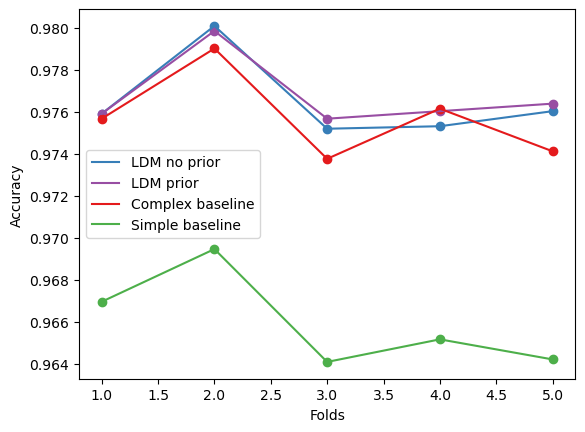

In [117]:
x = [1,2,3,4,5]
plt.plot(x,Accuracy,label='LDM no prior', color = '#377eb8')
plt.plot(x,Accuracy_prior, label='LDM prior', color = '#984ea3')
plt.plot(x,Accuracy_baseline, label='Complex baseline', color = '#e41a1c')
plt.plot(x,Accuracy_stupid_baseline, label='Simple baseline', color = '#4daf4a')
plt.scatter(x, Accuracy, facecolors='#377eb8', edgecolors='#377eb8')
plt.scatter(x, Accuracy_prior, facecolors='#984ea3', edgecolors='#984ea3')
plt.scatter(x, Accuracy_baseline, facecolors='#e41a1c', edgecolors='#e41a1c')
plt.scatter(x, Accuracy_stupid_baseline, facecolors='#4daf4a', edgecolors='#4daf4a')
plt.ylabel('Accuracy')
plt.xlabel('Folds')
plt.legend()
plt.show()

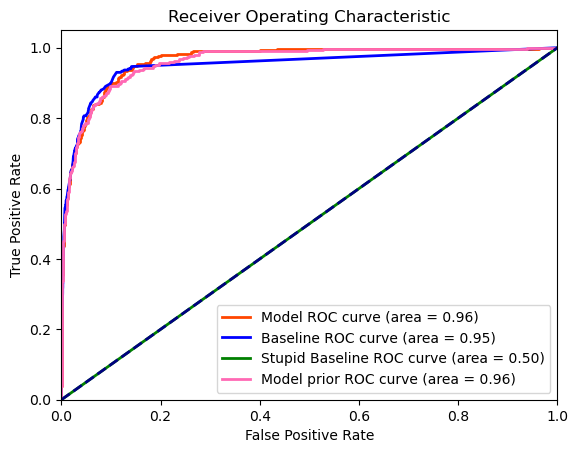

In [118]:
from sklearn.metrics import roc_curve, auc
# Compute FPR, TPR, and thresholds
y_true = connections
y_true[y_true == -1] = 0
stupid_baseline = [2765/num_connectins] * len(sigmoid_value) 

# Compute ROC curve and AUC for sigmoid_value predictions
fpr1, tpr1, _ = roc_curve(y_true, sigmoid_value)
roc_auc1 = auc(fpr1, tpr1)

# Compute ROC curve and AUC for baseline predictions
fpr2, tpr2, _ = roc_curve(y_true, Baseline)
roc_auc2 = auc(fpr2, tpr2)

# Compute ROC curve and AUC for stupid baseline predictions
fpr3, tpr3, _ = roc_curve(y_true, stupid_baseline)
roc_auc3 = auc(fpr3, tpr3)

# Compute ROC curve and AUC for sigmoid_value predictions
fpr4, tpr4, _ = roc_curve(y_true, sigmoid_value_prior)
roc_auc4 = auc(fpr4, tpr4)

# Plot the ROC curve for all models
plt.figure()
plt.plot(fpr1, tpr1, color='orangered', lw=2, label='Model ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='blue', lw=2, label='Baseline ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='green', lw=2, label='Stupid Baseline ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='hotpink', lw=2, label='Model prior ROC curve (area = %0.2f)' % roc_auc4)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()